In [6]:
import os
import time

import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd
import numpy as np

from torch.utils.data import DataLoader
from torch.distributions.multivariate_normal import MultivariateNormal

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

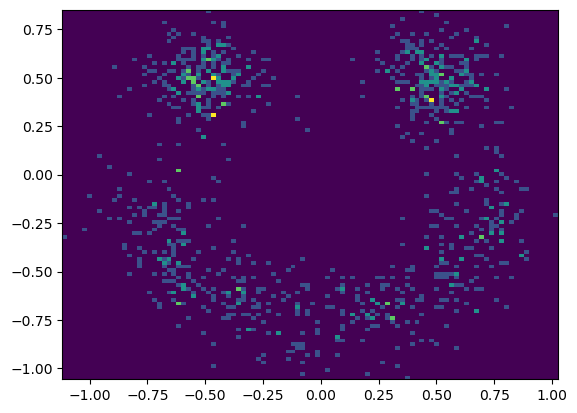

In [9]:
N = 1000
sd = 0.125
 
# left eye
x1 = np.random.normal(loc=-0.5, scale=sd, size=int(N/2/2))
y1 = np.random.normal(loc=0.5, scale=sd, size=int(N/2/2))
x2 = np.random.normal(loc=0.5, scale=sd, size=int(N/2/2))
y2 = np.random.normal(loc=0.5, scale=sd, size=int(N/2/2))
theta = np.random.uniform(np.pi, 2*np.pi, size=int(N/2))
radius = 0.75
x3 = radius * np.cos(theta) + np.random.normal(scale=sd, size=int(N/2))
y3 = radius * np.sin(theta) + np.random.normal(scale=sd, size=int(N/2))
# combined
x = np.concatenate([x1, x2, x3])
y = np.concatenate([y1, y2, y3])

plt.hist2d(x, y, bins=100);

In [30]:
x_torch = torch.from_numpy(x).unsqueeze(-1)
y_torch = torch.from_numpy(y).unsqueeze(-1)

data = torch.cat([x_torch, y_torch], axis=1)
data

tensor([[-0.4823,  0.3458],
        [-0.3323,  0.4592],
        [-0.5258,  0.5207],
        ...,
        [-0.3616, -0.5902],
        [-0.3728, -0.3964],
        [-0.5867, -0.5939]], dtype=torch.float64)

In [ ]:
class NormalizingFlow(nn.Module):
    def __init__(self):
        super(NormalizingFlow, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(2*data_dim, data_dim),
            nn.ReLU(),
            nn.Linear(data_dim, data_dim),
            nn.ReLU(),
            nn.Linear(data_dim, data_dim),
            nn.ReLU(),
            nn.Sigmoid()
        )
    
    def forward(self, x, hinting):
        data_cat = torch.cat([x, hinting], axis=1)
        return self.network(data_cat)